In [247]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [248]:
plt.rcParams['figure.figsize'] = (15,7)

In [6]:
df = pd.read_csv('datasets/sample_submission.csv', sep=',')

In [390]:
df_ids = pd.read_csv('datasets/store_id_relation.csv', sep=',')
df_date_info = pd.read_csv('datasets/date_info.csv', sep=',')
df_air_visits = pd.read_csv('datasets/air_visit_data.csv', sep=',')
df_air_info = pd.read_csv('datasets/air_store_info.csv', sep=',')
df_hpg_info = pd.read_csv('datasets/hpg_store_info.csv', sep=',')

df_hpg_reserve = pd.read_csv('datasets/hpg_reserve.csv', sep=',')
df_air_reserve = pd.read_csv('datasets/air_reserve.csv', sep=',')


In [291]:
TEST_START_DATE = dt.date(2017, 4, 3)
TEST_END_DATE = dt.date(2017, 5, 1)

In [209]:
df_date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [419]:
dates_df = df_date_info.merge(
    df_air_visits, left_on='calendar_date', right_on='visit_date', how='outer'
).drop(columns='visit_date')
dates_df.head()

,calendar_date,day_of_week,holiday_flg,air_store_id,visitors
0,2016-01-01,Friday,1,air_d0e8a085d8dc83aa,8.0
1,2016-01-01,Friday,1,air_5c65468938c07fa5,8.0
2,2016-01-01,Friday,1,air_f690c42545146e0a,7.0
3,2016-01-01,Friday,1,air_09a845d5b5944b01,56.0
4,2016-01-01,Friday,1,air_d0a7bd3339c3d12a,62.0


In [391]:
df_hpg_reserve = df_ids.merge(
    df_hpg_reserve, on='hpg_store_id', how='left'
).drop(columns='hpg_store_id')

In [392]:
df_hpg_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_63b13c56b7201bd9,2016-01-04 12:00:00,2016-01-03 14:00:00,7
1,air_63b13c56b7201bd9,2016-01-04 14:00:00,2016-01-02 13:00:00,4
2,air_63b13c56b7201bd9,2016-01-05 12:00:00,2016-01-01 08:00:00,3
3,air_63b13c56b7201bd9,2016-01-09 12:00:00,2016-01-07 20:00:00,6
4,air_63b13c56b7201bd9,2016-01-11 12:00:00,2016-01-10 15:00:00,3


In [399]:
df_air_reserve.visit_datetime = pd.to_datetime(df_air_reserve.visit_datetime)
df_air_reserve.reserve_datetime = pd.to_datetime(df_air_reserve.reserve_datetime)

df_hpg_reserve.visit_datetime = pd.to_datetime(df_hpg_reserve.visit_datetime)
df_hpg_reserve.reserve_datetime = pd.to_datetime(df_hpg_reserve.reserve_datetime)


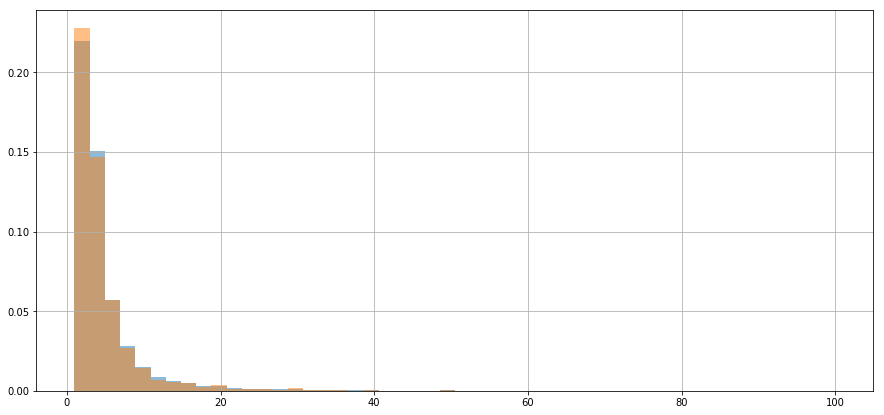

In [400]:
df_air_reserve.reserve_visitors.hist(bins=50, alpha = 0.5, normed=1)
df_hpg_reserve.reserve_visitors.hist(bins=50, alpha = 0.5, normed=1)

In [296]:
df_hpg_reserve.describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


In [255]:
df_hpg_reserve.quantile(0.9)

reserve_visitors    10.0
Name: 0.9, dtype: float64

In [257]:
df_air_reserve.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [348]:
df_air_reserve.quantile(0.9)

reserve_visitors    8.0
Name: 0.9, dtype: float64

In [396]:
df_hpg_reserve.tail(5)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
28178,air_465bddfed3353b23,2017-04-10 19:00:00,2017-03-23 20:00:00,23
28179,air_465bddfed3353b23,2017-04-21 12:00:00,2017-04-17 16:00:00,8
28180,air_465bddfed3353b23,2017-04-27 18:00:00,2017-04-18 09:00:00,4
28181,air_465bddfed3353b23,2017-04-28 19:00:00,2017-04-19 13:00:00,15
28182,air_465bddfed3353b23,2017-05-02 19:00:00,2017-04-12 21:00:00,2


In [431]:
avg_air_bw_df = df_air_reserve.copy()
avg_air_bw_df['visit_date'] = pd.to_datetime(avg_air_bw_df.visit_datetime.dt.date)
avg_air_bw_df['booking_window'] = (avg_air_bw_df.visit_datetime - avg_air_bw_df.reserve_datetime).dt.seconds/3600
avg_air_bw_df.columns
avg_air_bw_df = avg_air_bw_df.groupby(['air_store_id', 'visit_date']).agg(
    {'reserve_visitors': 'mean', 
     'booking_window': 'median',
     'visit_datetime': 'count',
    })

In [432]:
avg_hpg_bw_df = df_hpg_reserve.copy()
avg_hpg_bw_df['visit_date'] = pd.to_datetime(avg_hpg_bw_df.visit_datetime.dt.date)
avg_hpg_bw_df['booking_window'] = (avg_hpg_bw_df.visit_datetime - avg_hpg_bw_df.reserve_datetime).dt.seconds/3600
avg_hpg_bw_df.columns
avg_hpg_bw_df = avg_hpg_bw_df.groupby(['air_store_id', 'visit_date']).agg(
    {'reserve_visitors': 'mean', 
     'booking_window': 'median',
     'visit_datetime': 'count',
    })

In [430]:
avg_air_bw_df.head(50)

reserve_visitors  booking_window  \
air_store_id         visit_date                                     
air_00a91d42b08b08d9 2016-10-31          2.000000             4.0   
                     2016-12-05          9.000000             4.0   
                     2016-12-14         18.000000             9.0   
                     2016-12-17          2.000000             3.0   
                     2016-12-20          4.000000             3.0   
                     2017-02-18          9.000000            17.0   
                     2017-02-23         12.000000            23.0   
                     2017-03-01          3.000000            17.0   
                     2017-03-14          4.000000             4.0   
                     2017-03-21          3.000000             4.0   
                     2017-03-24          2.000000             5.0   
                     2017-04-04          2.000000             4.0   
air_0164b9927d20bcc3 2016-10-28          6.000000             1.5   
                     2016-11-01          5.000000            12.5   
                     2016-11-02          3.000000             4.0   
                     2016-11-08          9.000000             0.0   
                     2016-11-10          3.000000            12.5   
                     2016-11-11          2.000000            13.0   
                     2016-11-14          5.666667             9.0   
                     2016-11-15          3.000000            22.0   
                     2016-11-16          2.000000             2.0   
                     2016-11-18          6.500000            11.0   
                     2016-11-21          3.000000             6.0   
                     2016-11-22          4.500000            13.0   
                     2016-11-24          2.000000             2.0   
                     2016-11-26         10.000000             7.0   
                     2016-11-28          2.000000            20.0   
                     2016-12-02          3.000000            21.0   
                     2016-12-05          2.000000             3.0   
                     2016-12-06          2.000000             2.0   
                     2016-12-07          2.000000            20.0   
                     2016-12-08          3.000000             3.0   
                     2016-12-14          2.000000            20.0   
                     2016-12-15          5.000000             5.0   
                     2016-12-16          2.000000            22.0   
                     2016-12-19          2.000000            11.0   
                     2016-12-21          2.000000             5.0   
                     2016-12-22          3.500000             6.5   
                     2016-12-23          2.000000            22.0   
                     2016-12-26          2.000000             8.0   
                     2016-12-27          3.000000            22.0   
                     2017-01-06          3.000000             1.0   
                     2017-01-12          5.000000            16.5   
                     2017-01-13          2.000000            17.0   
                     2017-01-14          9.000000            23.0   
                     2017-01-16          3.000000             3.0   
                     2017-01-17          3.000000             5.5   
                     2017-01-19          2.000000             1.0   
                     2017-01-20          2.000000             8.0   
                     2017-01-23          1.833333             9.5   

                                 visit_datetime  
air_store_id         visit_date                  
air_00a91d42b08b08d9 2016-10-31               1  
                     2016-12-05               1  
                     2016-12-14               1  
                     2016-12-17               1  
                     2016-12-20               1  
                     2017-02-18               1  
                     2017-02-23             

In [402]:
avg_hpg_bw_df.head(50)

reserve_visitors  booking_window
air_store_id         visit_date                                  
air_00a91d42b08b08d9 2016-01-14              2.00             5.0
                     2016-01-15              4.00            22.0
                     2016-01-16              2.00            22.0
                     2016-01-22              2.00            10.0
                     2016-01-29              5.00             0.0
                     2016-02-05              2.00             1.0
                     2016-03-08              3.00             2.0
                     2016-04-04              1.00            19.0
                     2016-04-07              2.00            14.0
                     2016-04-08              3.50             9.0
                     2016-04-09              2.00            20.0
                     2016-04-22              2.00            23.0
                     2016-04-28              2.00             0.0
                     2016-05-06              2.00             4.0
                     2016-05-12              5.00             3.0
                     2016-05-13              3.00            11.0
                     2016-05-20              1.00            22.0
                     2016-05-27             15.00             9.0
                     2016-06-03              4.00            22.0
                     2016-06-09              5.00            21.0
                     2016-06-10              4.00             8.0
                     2016-06-16              2.00            12.0
                     2016-06-17              2.00            19.0
                     2016-06-22              3.50            14.5
                     2016-06-24              3.00            15.5
                     2016-06-30              3.00            21.0
                     2016-07-01              1.00             5.0
                     2016-07-06              7.00            14.0
                     2016-07-08              9.00             8.0
                     2016-07-09              6.00            20.0
                     2016-07-13              4.00            21.0
                     2016-07-16              3.00             7.0
                     2016-07-20              1.00            10.0
                     2016-07-21              2.25            14.0
                     2016-07-22              2.00            23.0
                     2016-07-27              2.00             7.0
                     2016-08-05              2.00            10.0
                     2016-08-19              3.50            12.5
                     2016-08-20             17.00            18.0
                     2016-08-25             14.00             3.0
                     2016-08-26              2.00            22.0
                     2016-08-27              3.00             5.0
                     2016-09-02              2.50            15.5
                     2016-09-12              2.00             6.0
                     2016-09-17              2.00            23.0
                     2016-09-23              1.00             1.0
                     2016-09-24              2.00             8.0
                     2016-09-28              2.00             8.0
                     2016-10-25              1.00            23.0
                     2016-10-26             12.00            22.0

In [416]:
avg_bw_df = avg_air_bw_df.reset_index().merge(
    avg_hpg_bw_df.reset_index(),
    how='outer',
    on=['air_store_id', 'visit_date'],
    suffixes=['_air', '_hpg'],
).fillna(0)

In [417]:
avg_bw_df.head()

,air_store_id,visit_date,reserve_visitors_air,booking_window_air,reserve_visitors_hpg,booking_window_hpg
0,air_00a91d42b08b08d9,2016-10-31,2.0,4.0,2.0,4.0
1,air_00a91d42b08b08d9,2016-12-05,9.0,4.0,1.0,22.0
2,air_00a91d42b08b08d9,2016-12-14,18.0,9.0,0.0,0.0
3,air_00a91d42b08b08d9,2016-12-17,2.0,3.0,2.0,1.0
4,air_00a91d42b08b08d9,2016-12-20,4.0,3.0,4.0,2.0


In [ ]:
bw_and_visits_df = avg_bw_df.merge(
    dates_df,
    left_on=['visit_date', 'air_store_id'],
    right_on=['calendar_date', 'air_store_id'],
    how='outer',
)

In [412]:
avg_hpg_bw_df_1 = avg_hpg_bw_df.reset_index()
avg_hpg_bw_df_1.head()

,air_store_id,visit_date,reserve_visitors,booking_window
0,air_00a91d42b08b08d9,2016-01-14,2.0,5.0
1,air_00a91d42b08b08d9,2016-01-15,4.0,22.0
2,air_00a91d42b08b08d9,2016-01-16,2.0,22.0
3,air_00a91d42b08b08d9,2016-01-22,2.0,10.0
4,air_00a91d42b08b08d9,2016-01-29,5.0,0.0


In [280]:
restaurants_df = df_ids.merge(df_air_info, on='air_store_id', how='outer')
len(restaurants_df)

829

In [281]:
restaurants_df = restaurants_df.merge(
    df_hpg_info,
    on='hpg_store_id',
    how='left'
)
len(restaurants_df)

829

In [283]:
def mean_coord(xs, ys):
    res = []
    for x, y in zip(xs, ys):
        if not np.isnan(x) and not np.isnan(y):
            res.append((x+y)/2)
        elif np.isnan(x):
            res.append(y)
        else:
            res.append(x)
    return res

In [284]:
restaurants_df['mean_latitude'] = mean_coord(restaurants_df.latitude_y, restaurants_df.latitude_x)
restaurants_df['mean_longitude'] = mean_coord(restaurants_df.longitude_y, restaurants_df.longitude_x)
# restaurants_df['area_name'] = mean_coord(restaurants_df.air_area_name_y, restaurants_df.hpg_area_name)

In [285]:
restaurants_df.head()

,air_store_id,hpg_store_id,air_genre_name,air_area_name,latitude_x,longitude_x,hpg_genre_name,hpg_area_name,latitude_y,longitude_y,mean_latitude,mean_longitude
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Daimyō,33.586994,130.394894,NaN,NaN,NaN,NaN,33.586994,130.394894
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809,Dining bar,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Italian,Shizuoka-ken Hamamatsu-shi Sukenobuchō,34.721644,137.738944,34.716270,137.732442
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9,Okonomiyaki/Monja/Teppanyaki,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,35.658068,139.751599
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8,Izakaya,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.591358,130.414878,NaN,NaN,NaN,NaN,33.591358,130.414878
4,air_965b2e0cf4119003,hpg_653238a84804d8e7,Izakaya,Tōkyō-to Meguro-ku Kamimeguro,35.641463,139.698171,NaN,NaN,NaN,NaN,35.641463,139.698171


In [286]:
restaurants_df = restaurants_df.drop(
    columns=['latitude_y', 'latitude_x', 'longitude_x', 'longitude_y', 'hpg_store_id']
)

In [289]:
restaurants_df.tail()

,air_store_id,hpg_store_id,air_genre_name,air_area_name,hpg_genre_name,hpg_area_name,mean_latitude,mean_longitude
824,air_6b65745d432fd77f,NaN,International cuisine,Tōkyō-to Shibuya-ku Shibuya,NaN,NaN,35.661777,139.704051
825,air_9bf595ef095572fb,NaN,International cuisine,Tōkyō-to Shibuya-ku Shibuya,NaN,NaN,35.661777,139.704051
826,air_764f71040a413d4d,NaN,Asian,Tōkyō-to Shibuya-ku Shibuya,NaN,NaN,35.661777,139.704051
827,air_10bbe8acd943d8f6,NaN,Asian,Tōkyō-to Shibuya-ku Shibuya,NaN,NaN,35.661777,139.704051
828,air_c8fe396d6c46275d,NaN,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,NaN,NaN,43.055460,141.340956


In [197]:
restaurants_df.groupby('air_genre_name').nunique()

,air_store_id,hpg_store_id,air_genre_name,air_area_name,hpg_genre_name,hpg_area_name,mean_latitude,mean_longitude
air_genre_name,,,,,,,,
Asian,2,0,1,1,0,0,1,1
Bar/Cocktail,79,8,1,22,4,3,27,27
Cafe/Sweets,181,4,1,46,0,0,48,48
Creative cuisine,13,2,1,6,0,0,6,6
Dining bar,108,25,1,31,5,11,42,42
International cuisine,2,0,1,1,0,0,1,1
Italian/French,102,20,1,24,2,4,28,28
Izakaya,197,63,1,56,6,19,75,75
Japanese food,63,7,1,22,3,5,28,28


In [198]:
restaurants_df.groupby('hpg_genre_name').nunique()

,air_store_id,hpg_store_id,air_genre_name,air_area_name,hpg_genre_name,hpg_area_name,mean_latitude,mean_longitude
hpg_genre_name,,,,,,,,
Amusement bar,1,5,1,1,1,1,2,2
Bar/Cocktail,0,7,0,0,1,3,3,3
Bistro,0,22,0,0,1,14,14,14
Cafe,1,16,1,1,1,9,10,10
Cantonese food,0,4,0,0,1,1,1,1
Chinese general,0,91,0,0,1,34,35,35
Creation,5,410,2,4,1,90,98,98
Creative Japanese food,1,60,1,1,1,19,20,20
Dim Sum/Dumplings,0,2,0,0,1,2,2,2


In [200]:
len(restaurants_df[restaurants_df['hpg_store_id'].isna()==False])

4777

In [203]:
sum(restaurants_df.groupby('hpg_genre_name').nunique()['hpg_store_id'])

4690

In [204]:
len(restaurants_df[restaurants_df['hpg_genre_name'].isna()==False])

4690

In [150]:
len(restaurants_df[np.logical_and(restaurants_df['air_area_name_x'].isna()==False,restaurants_df['air_area_name_y'].isna()==False)])


829

In [153]:
len(restaurants_df['air_area_name_x'].isna()==restaurants_df['air_area_name_y'].isna())

5456

In [157]:
len(restaurants_df['air_area_name_x']==restaurants_df['hpg_area_name'])

5456